<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 1 - Search <br>
<font color=696880 size=4>
<div dir=ltr>
Dorsa Ghobadi



____

# Personal Data

In [1]:
student_number = '401105601'
Name = 'Mahdi'
Last_Name = 'Akbari'

# Rules
- Make sure that all of your cells can be run perfectly.
-Do not change the Parts which are not marked with #TODO
-Complete the functions or parts that are marked with #TODO
-Feel free to add functions if you need!

## Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from queue import Queue, LifoQueue, PriorityQueue
import random


# Uninformed & Informed Search

<font size=4>
Author: Dorsa Ghobadi
			<br/>
                <font color=red>
Please run all the cells.
     </font>
</font>
                <br/>
    </div>

## Problem Definition

In This Problem, We want to investigate Maze Problem with the focus on implementing BFS,DFS and A-Star algorithm to solve it. This notebook is inspired by the [pacman](https://freepacman.org/) game. We generate a random maze and put the pacman in the top left crner and the food in the bottom right corner. The goal is to find a way from the pacman to the food using different search algorithms.



## Code

In [3]:
def generate_maze(rows, cols, wall_prob=0.3):
    np.random.seed(40)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, start, goal

def plot_maze(maze, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray")
    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='green', s=100, label='Food')  # Food
    plt.legend()
    plt.show()

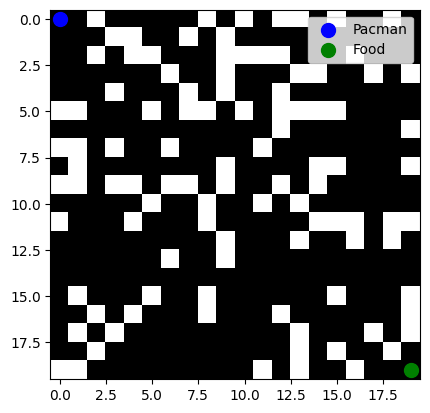

In [4]:
rows, cols = 20, 20
maze, start, goal = generate_maze(rows, cols)
plot_maze(maze, start=start, goal=goal)


In [5]:
class SearchAlgorithm:
    def __init__(self, maze):
        self.maze = maze
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors


In [6]:
def plot_algorithm(maze, start, goal,name,algorithm):
  path = algorithm.search(start, goal)
  result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes}
  print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}")
  plot_maze(maze, path, start, goal)



In [7]:
class DFS(SearchAlgorithm):
    def search(self, start, goal):
        stack = [(start,[start])] 
        self.visited[start] = 1 
        
        while start:
            current_position , current_path = stack.pop()

            if (current_position == goal):
                return current_path
            
            for neighbor in self.get_neighbors(current_position):
                if not self.visited[neighbor]:
                    self.visited[neighbor] = 1
                    stack.append((neighbor, current_path + [neighbor]))

            self.expanded_nodes += 1 
        return None 



DFS: Expanded Nodes = 180


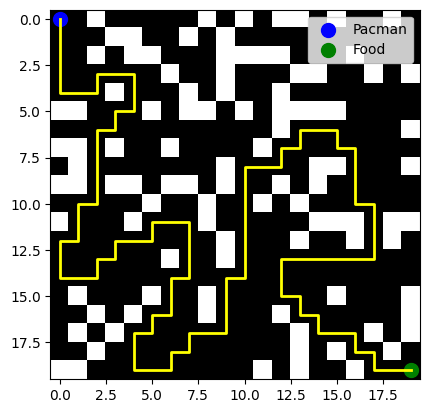

In [17]:
plot_algorithm(maze,start,goal,'DFS', DFS(maze))

In [8]:
from collections import deque

class BFS(SearchAlgorithm):
    def search(self, start, goal):

        queue = deque([(start, [start])])
        self.visited[start] = 1

        while queue : 
            current_position , current_path = queue.popleft()

            if (current_position == goal): 
                return current_path
            
            for neighbor in self.get_neighbors(current_position): 
                if not self.visited[neighbor]:
                    self.visited[neighbor] = 1
                    queue.append((neighbor, current_path + [neighbor]))

            self.expanded_nodes += 1;

        return None

BFS: Expanded Nodes = 279


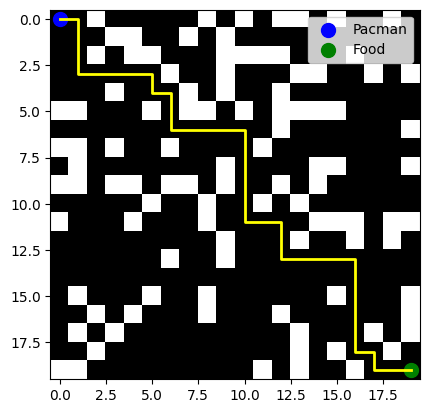

In [20]:
plot_algorithm(maze,start,goal,'BFS', BFS(maze))

Question:

So far, we have explored three uninformed search methods: DFS, BFS. Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations (consider both time and memory).

In [9]:
import heapq

class AStar(SearchAlgorithm):
    def heuristic(self, pos, goal):
      return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1]) # manhatan distance

    def search(self, start, goal):
        priority_queue = []
        heapq.heappush(priority_queue, (0, start, [start], 0)) 
        
        self.visited[start] = 1
        g_costs = {start: 0}
        
        while priority_queue:
            _ , current_position, current_path, g = heapq.heappop(priority_queue)

            if current_position == goal:
                return current_path
            
            for neighbor in self.get_neighbors(current_position):
                
                tentative_g = g + 1  
                if neighbor not in g_costs or tentative_g < g_costs[neighbor]:
                    g_costs[neighbor] = tentative_g
                    f = tentative_g + self.heuristic(neighbor, goal)  # f = g + h
                    heapq.heappush(priority_queue, (f, neighbor, current_path + [neighbor], tentative_g))
                    self.visited[neighbor] = 1  
            
            self.expanded_nodes += 1 

        return None



A*: Expanded Nodes = 168


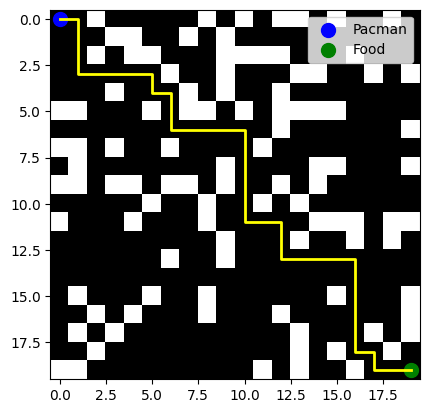

In [10]:
plot_algorithm(maze,start,goal,'A*', AStar(maze))

Question:

Explain your heuristic and observation's result. Also, compare the A* method with Uniformed search in the context of the Maze problem.

in A* search we use the manhattan distance for defining heuristic function because of the restricted movements (up,down,left & right) manhattan distance will calculate the minimum horizontally and vertically it is proper heuristic function for A* search.
for comparing A* with Uniformed search we can say that if the heuristic function in A* be admissible it will guarantee that the A* solution is shortest path, that is because in A* search two parameters are involved the cost of each path and it's heuristic function value also we know from the search results that A* search will expand less nodes to find the solution than uniformed search.

Now we want to explore a situation where each cell of the maze has an entrance cost, which means in order to enter that cell we must pay a fixed price. you should implement the above search algorithms with the least payed cost.

In [4]:
def generate_maze_with_costs(rows, cols, wall_prob=0.3):
    np.random.seed(137)
    maze = np.random.choice([0, 1], size=(rows, cols), p=[1-wall_prob, wall_prob])
    costs = np.random.randint(1, 11, size=(rows, cols))
    start = (0, 0)
    goal = (rows-1, cols-1)
    maze[start] = 0
    maze[goal] = 0
    return maze, costs, start, goal

def plot_maze_with_costs(maze, costs, path=None, start=None, goal=None):
    plt.imshow(maze, cmap="gray", vmin=0, vmax=1)

    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == 0:
                cl = 'red' if costs[i,j] > 6 else ('green' if costs[i,j] < 4 else 'orange')
                plt.text(j, i, str(costs[i, j]), ha='center', va='center', color=cl, fontsize=8)

    if path:
        x, y = zip(*path)
        plt.plot(y, x, color='yellow', linewidth=2)  # Plot path in yellow
    if start:
        plt.scatter(start[1], start[0], color='blue', s=100, label='Pacman')  # Pacman start
    if goal:
        plt.scatter(goal[1], goal[0], color='pink', s=100, label='Food')  # Food
    plt.legend()
    plt.show()


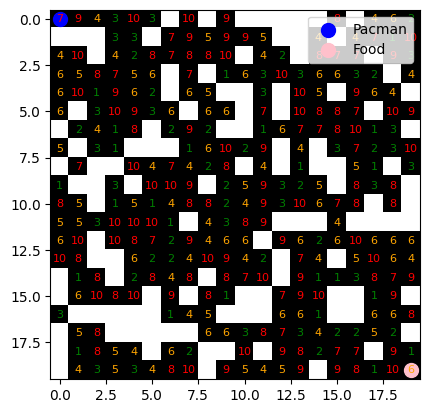

In [5]:
rows, cols = 20, 20
maze, costs, start, goal = generate_maze_with_costs(rows, cols)
plot_maze_with_costs(maze, costs, start=start, goal=goal)

In [6]:
class SearchAlgorithmWithCosts:
    def __init__(self, maze, costs):
        self.maze = maze
        self.costs = costs
        self.rows, self.cols = maze.shape
        self.visited = np.zeros_like(maze)
        self.expanded_nodes = 0

    def get_neighbors(self, pos):
        neighbors = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up
        for d in directions:
            new_pos = (pos[0] + d[0], pos[1] + d[1])
            if 0 <= new_pos[0] < self.rows and 0 <= new_pos[1] < self.cols and not self.maze[new_pos] and not self.visited[new_pos]:
                neighbors.append(new_pos)
        return neighbors

    def calculate_total_cost(self, path):
        return sum(self.costs[pos] for pos in path)



In [7]:
def plot_algorithms_with_costs(maze, costs, start, goal,name,algorithm):
    path, total_cost = algorithm.search(start, goal)
    result = {'path': path, 'expanded_nodes': algorithm.expanded_nodes, 'total_cost': total_cost}
    print(f"{name}: Expanded Nodes = {algorithm.expanded_nodes}, Total Cost = {total_cost}")
    plot_maze_with_costs(maze, costs, path, start, goal)


In [10]:
class DFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):

        stack = [(start, [start] , 0)]
        best_cost = float('inf')
        best_path = None

        while stack: 
            current_position, current_path, current_cost = stack.pop()
            
            if (current_position == goal):
                if (current_cost < best_cost):
                    best_path = current_path
                    best_cost = current_cost
                continue

            self.visited[current_position] = 1
            self.expanded_nodes += 1

            for neighbor in self.get_neighbors(current_position):
                new_cost = current_cost + self.costs[neighbor]
                stack.append((neighbor, current_path + [neighbor], new_cost))


        return best_path, best_cost


DFS: Expanded Nodes = 381, Total Cost = 914


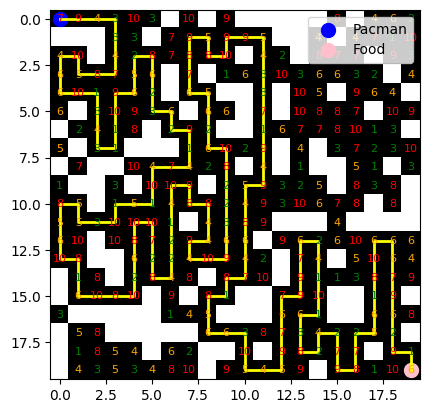

In [11]:
plot_algorithms_with_costs(maze, costs, start, goal,'DFS',DFSWithCosts(maze,costs))

In [26]:
from collections import deque

class BFSWithCosts(SearchAlgorithmWithCosts):
    def search(self, start, goal):
        queue = deque([(start, [start] , 0)])
        best_cost = float('inf')
        best_path = None

        self.visited[start] = 1

        while queue : 
            current_position , current_path , current_cost = queue.popleft()

            if (current_position == goal):
                if (current_cost < best_cost):
                    best_path = current_path
                    best_cost = current_cost
                continue
            
            self.visited[current_position] = 1
            self.expanded_nodes += 1

            for neighbor in self.get_neighbors(current_position):
                new_cost = current_cost + self.costs[neighbor]
                queue.append((neighbor, current_path + [neighbor], new_cost))


        return best_path, best_cost


BFS: Expanded Nodes = 210649, Total Cost = 177


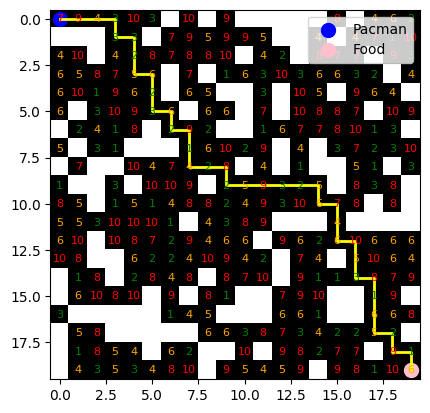

In [27]:
plot_algorithms_with_costs(maze, costs, start, goal,'BFS',BFSWithCosts(maze,costs))

In [30]:
import heapq

class AStarWithCosts(SearchAlgorithmWithCosts):
    def heuristic(self, pos, goal):
        return abs(pos[0] - goal[0]) + abs(pos[1] - goal[1])

    def search(self, start, goal):
        priority_queue = []
        heapq.heappush(priority_queue, (0, start, [start], 0)) 

        best_cost = float('inf')
        best_path = None
        
        g_costs = {start: 0}
        visited = set() 

        while priority_queue:
            f, current_position, current_path, g = heapq.heappop(priority_queue) # g is current cost 

            if current_position == goal:
                if g < best_cost:  
                    best_path = current_path
                    best_cost = g
                continue

            if current_position in visited:
                continue
            visited.add(current_position)

            for neighbor in self.get_neighbors(current_position):
                tentative_g = g + self.costs[neighbor]

                if neighbor not in g_costs or tentative_g < g_costs[neighbor]:
                    g_costs[neighbor] = tentative_g
                    f = tentative_g + self.heuristic(neighbor, goal)  # f = g + h
                    heapq.heappush(priority_queue, (f, neighbor, current_path + [neighbor], tentative_g))

            self.expanded_nodes += 1 

        return best_path, best_cost


A*: Expanded Nodes = 267, Total Cost = 170


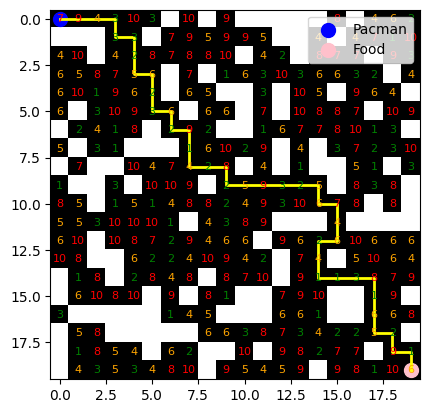

In [31]:
plot_algorithms_with_costs(maze, costs, start, goal,'A*',AStarWithCosts(maze,costs))

Question:

now that you have explored these methods(DFS, BFS,A star) in priced manner, Briefly explain the advantages and disadvantages of each method in the context of the Maze Problem and compare their performance based on your observations.

about DFS we can say that this algorithm normally will find a quick path but not shortest path but in complex and bigger mazes normally it is possible to get stuck in searching. so for finding the cheapest way DFS is not suitable!

about BFS we can say that if a maze have a solution BFS will guaranteed to be founded, but in BFS with cost it is not guaranteed to find the cheapest path also BFS use a lot of memory and will drop the BFS performance

about A* search we can say that its like that A* is combine of BFS and DFS benefits by using both cost G and heuristic function h, and if the heuristic function be admissible the A* search will find the cheapest path 100% because of that the performance of A* algorithm is highly depended on it's heuristic function